<a href="https://colab.research.google.com/github/kumaramardeep342/Colab-Work/blob/main/Ed_AI__DL_M9_inclass_Handwritten_Digits_using_Autoencoder_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#Mount the Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Handwritten Digits using Autoencoder Pytorch

## Problem Statement
- MNIST data - (None,784)
- Autoencoders
- Reconstruct the input
- Encoder layer : (None,784),...=(None,3) #compressed representation
- Decoder layer :(None,3) ,... = (None,784) #reconstructed layer

![alt text](https://i.imgur.com/Su00XUA.png)

## Import the required libraries - Pytorch

In [13]:
# for data analysis
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for model training
import torch
from torchvision import datasets,transforms # torchvision (for computer vision)
from torch.utils.data import DataLoader


import torch.nn as nn #  Contains classes and functions to define neural network layers and architectures. architecture (layers, activations, loss functions)
#nn.Linear: Fully connected (dense) layers.
#nn.Conv2d: Convolutional layers.
#nn.ReLU, nn.Sigmoid: Activation functions.
#nn.CrossEntropyLoss, nn.MSELoss: Loss functions.

import torch.optim as optim #provides optimization algorithms used to update the model's parameters during training.
#optim.SGD: Stochastic Gradient Descent.
#optim.Adam: Adaptive Moment Estimation.


- 2 ways to compose a deep learning code
- Sequential Process - No need to intermediate outputs - will be using this concept as after encoder we need to execute the Decoder to re-construct the input.
- Require intermediate outputs - Functional Compostion
- Functional Composition - Callable instance - call uopn last layer .

## Pre-process the dataset

In [14]:
# Hyperparameters
batch_size = 16
torch.manual_seed(42) ##SEEDING FOR GETTING SAME OUTPUT

In [15]:
transform = transforms.Compose([transforms.ToTensor()])
#transform is used to preprocess the input data before feeding it into the neural network. Preprocessing can include tasks like normalization, scaling, data augmentation, or converting the data to the format expected by the model.
#ToTensor() transformation converts images (which are typically in the form of NumPy arrays or PIL images) into PyTorch tensors.This scales the pixel values of an image from the range [0, 255] (for RGB images) or [0, 1] (for grayscale images).

# Download and load the training data
train_dataset = datasets.MNIST(root='./data',train = True,download =True,transform = transform)
train_loader = DataLoader(train_dataset,batch_size = batch_size,shuffle = True)


# Autoencoder architecture - Linear Composition

In [16]:
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder,self).__init__()
    # Encoder
    self.encoder = nn.Sequential(
        nn.Linear(784,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,12),
        nn.ReLU(),
        nn.Linear(12,3) # Compressed representation
    )
    # Decoder
    self.decoder = nn.Sequential(
        nn.Linear(3,12),
        nn.ReLU(),
        nn.Linear(12,64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128,784),
        nn.Sigmoid()  # Output values between 0 and 1
    )

  def forward(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [17]:
# Initialize the autoencoder, loss function, and optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

In [18]:
# Training loop
num_epochs = 10
for epoch in range (num_epochs):
  for data in train_loader:
    img,_ = data #img indicates image and _  represent label
    img = img.view(img.size(0), -1) # Flatten the input
    # If img was originally a tensor of shape [batch_size, channels, height, width]
    #For example, if you have a batch of MNIST images of shape [128, 1, 28, 28] (batch of 128 grayscale images, each 28x28 pixels),
    #the result of img.view(img.size(0), -1) would be [128, 784] (each 28x28 image flattened into a vector of 784 values).

    #forward pass
    output = model(img)
    loss = criterion(output,img)

    # Backward pass and optimization
    optimizer.zero_grad() # Reset gradients
    loss.backward() # Compute gradients
    optimizer.step()  # Update weights

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Streaming output truncated to the last 5000 lines.
Epoch [9/10], Loss: 0.0332
Epoch [9/10], Loss: 0.0323
Epoch [9/10], Loss: 0.0353
Epoch [9/10], Loss: 0.0316
Epoch [9/10], Loss: 0.0344
Epoch [9/10], Loss: 0.0393
Epoch [9/10], Loss: 0.0324
Epoch [9/10], Loss: 0.0343
Epoch [9/10], Loss: 0.0259
Epoch [9/10], Loss: 0.0332
Epoch [9/10], Loss: 0.0311
Epoch [9/10], Loss: 0.0313
Epoch [9/10], Loss: 0.0360
Epoch [9/10], Loss: 0.0293
Epoch [9/10], Loss: 0.0287
Epoch [9/10], Loss: 0.0247
Epoch [9/10], Loss: 0.0349
Epoch [9/10], Loss: 0.0300
Epoch [9/10], Loss: 0.0291
Epoch [9/10], Loss: 0.0285
Epoch [9/10], Loss: 0.0390
Epoch [9/10], Loss: 0.0278
Epoch [9/10], Loss: 0.0329
Epoch [9/10], Loss: 0.0385
Epoch [9/10], Loss: 0.0329
Epoch [9/10], Loss: 0.0377
Epoch [9/10], Loss: 0.0378
Epoch [9/10], Loss: 0.0253
Epoch [9/10], Loss: 0.0352
Epoch [9/10], Loss: 0.0375
Epoch [9/10], Loss: 0.0326
Epoch [9/10], Loss: 0.0301
Epoch [9/10], Loss: 0.0343
Epoch [9/10], Loss: 0.0250
Epoch [9/10], Loss: 0.0406
Epoc

# Plot original and reconstructed images

In [29]:
# Function to visualize original and reconstructed images
def  visualize_reconstruction(model, data_loader):
  model.eval()
  with torch.no_grad():
    for data in data_loader:
      img,_= data
      img = img.view(img.size(0),-1)
      output = model(img)
      break

  # Plot original and reconstructed images
  n = 10
  plt.figure(figsize=(20, 4))
  for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i+1)
    plt.imshow(img[i].view(28, 28).numpy(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed image
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(output[i].view(28, 28).numpy(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

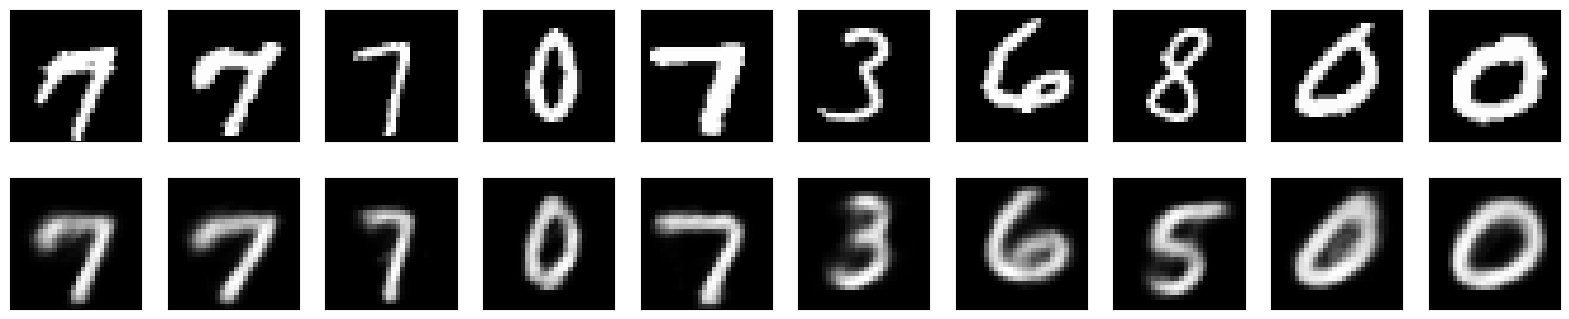

In [30]:
# Visualize the results
visualize_reconstruction(model, DataLoader(train_dataset, batch_size=12, shuffle=True))
# batch_size defining the number of images.